 # **Model project**
 ***

# The standard static labour supply model

In this model project, we present and solve a standard two-good static labour supply model, where agents value leisure and consumption. In the model presented an individual faces exogenously determined wage and non-labour income. The model is solved in three ways: theoretically, analytically and numerically. For the numerical optimisation, the chosen algorithm is a sequential (least-squares) quadratic programming (SQP) algorithm (SLSQP). Besides the simple model, we extend the model in two ways by including a proportional income tax and a progressive income tax. The size of the tax payment affects the income and therefore also hours worked and consumption level.

In part 2, we introduce the standard model and solve it theoretically, analytically and numerically. In part 3 we add a proportional tax to the standard model and in part 4 the model is solved with a progressive tax.

## The model

### The general assumptions

The agent only gets utility from enjoying leisure and consumption.

The utility function is a standard quasiconcave and monotone utility function: $U(C,L)$ with $U'_C>0$ and $U'_L>0$

The individual earn W per hour and the price of the consumption good is P. P is set as numeraire. 

The real wage can be denoted by $w = \frac{W}{P}$

The individual has non-labour income $\tilde{R}$, which in real terms will be expressed by $R = \frac{\tilde{R}}{P}$

### The utility function

For simplicity we assume that the utility function is a Cobb Douglas function: $$U(C,L)=C^{\alpha} L^{1-\alpha},$$ where $0 <\alpha < 1$. The agent gets utility from consumption, $C$, and leisure, $L$.

### The budget constraint

The agent has $T$ hours available for consumption, $C$, and leisure, $L$. Hours spend on leisure is hours spend not working, i.e. hours worked is given by $h = T - L$. 

The budget constraint is given by: $$C \leq wh+R \implies C \leq w(T - L) + R$$

### The agent's maximisation problem

The agent wishes to maximise:$$max_{C,L} U(C,L)=C^{\alpha} L^{1-\alpha}$$ subject to: $$C \leq w(T - L) + R$$

Since we are only interested in an interior solution we can replace the greater and equal sign with an equality: $$C=w(T-L) + R$$

This means that we only look at the intensive labour supply i.e. hours worked given employment.

## Solving the model using Python

Before solving the model using Python, we import the relevant packages for this project and a package used for pretty printing of our results.

In [68]:
import scipy as sp
from scipy import optimize
import scipy.integrate as integrate
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt

# for pretty printing
sm.init_printing(use_unicode=True)

### Analytically

We start by solving the model analytically.

Defining symbols:

In [3]:
C = sm.symbols('C') 
L = sm.symbols('L')
R = sm.symbols('R')
W = sm.symbols('W')
T = sm.symbols('T')
alpha = sm.symbols('alpha')
Lmin = sm.symbols('Lmin')

Defining the objective function (utility function) and budget constraint:

In [4]:
objective = C**(alpha)*L**(1-alpha)
objective

In [5]:
budget_constraint= sm.Eq(W*(T-L) + R,C)
budget_constraint

Solving in **four steps**:

1. **Isolate** $L$ from the budget constraint
2. **Substitute** in $L$
3. **Take the derivative** wrt. $C$
4. **Solve the FOC** for $C$

**Step 1: Isolate**

In [6]:
L_from_con = sm.solve(budget_constraint,L)
L_from_con

**Step 2: Substitute**

In [7]:
objective_subs = objective.subs(L,L_from_con[0])
objective_subs

**Step 3: Take the derivative**

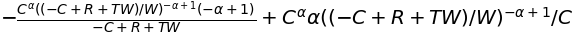

In [8]:
foc_C = sm.diff(objective_subs,C)
foc_C

**Step 3: Solve the FOC**

In [9]:
sol_C = sm.solve(sm.Eq(foc_C,0),C)
sol_C

Substituting $C^*$ into the expression for L obtained in step 1 yields $L^*$:

In [10]:
L_star = sm.simplify(L_from_con[0].subs(C,sol_C[0]))
L_star

This means that the analytical solution to the problem is given by: $$(C^*,L^*) = \left(\alpha(R+Tw),\frac{R + Tw - \alpha(R+Tw)}{w}\right)$$


### Numerically

Most estimators require the optimisation (maximisation or minimisation) of some objective function. However, in most cases, optimisation problems are too complicated to be solved analytically and therefore we can use numerical optimisation. 

Numerical optimisation requires the use of an algorithm. The definition of an algorithm is an iterative process that generates a series $x_0,x_1,...,x_n$ that converges to the local minimum (or maximum) $\hat{x}$. It is defined by a starting point $x_0$ (initial guess), an iterative formula (how to move from $x_n$ to $x_n+1$) and a stopping rule.

The iterative formula is the centrepiece of an algorithm as it states how the iterative method updates the current estimate of x. 

In this project, the chosen algorithm for the numerical optimisation is called a sequential (least-squares) quadratic programming (SQP) algorithm (SLSQP). The algorithm works well for constrained nonlinear optimisation. The drawback is that it is not as efficient as e.g. the BFGS optimisation method. The reason why we use the SLSQP anyway is due to the extension later on in the project where we have a non-linear budget constraint, and for consistency, we have chosen this algorithm for all parts of this project.

We start by defining the utility function and the budget constraint as python variables. Further, we also specify a value for T, R and W.

In [32]:
# a. define utility function
def CD_utility(x, parameters):
    c=x[0]
    l=x[1]
    alpha=parameters
    
    u= (c**alpha)*l**(1-alpha)
    return -u

# b. define budget constraint
def eq_constraint(x):
    return w*(T-x[1]) + R - x[0]

# c. setting values for T, R and w
T=14 # hours available
R=200 # non-labour income
w=150 # wage rate

We have added a minus in front of the utility function above since we are using `scipy.optimize` to maximise utility subject to the budget constraint. However, `scipy.optimize` does only have a minimisation attribute, which is the reason we have added a minus in front of the utility function. Further, x[0] corresponds to consumption and x[1] corresponds to leisure. 


We have set hours available equal to 14 ($T=14$) meaning the agent can maximum choose to work 14 hours. The non-labour income is equal to 200 ($R=200$). Lastly, the wage rate is set equal to 150 ($w=150$).

In [63]:
# a. setup
eq_con = {'type': 'eq', 'fun': eq_constraint}

# b. call optimizer
x0 = (5,5) # initial guess (a starting point)
alpha1=0.5 # setting a value for alpha
result = optimize.minimize(CD_utility,x0,args=alpha1,
                             method='SLSQP',
                             bounds=None,
                             constraints=eq_con,
                             options={'disp':True})

# c. storing the results
result_C1 = result.x[0]
result_L1 = result.x[1]

# d. printing the results
print('\n(C,L) = ',result.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -93.8971068015958
            Iterations: 13
            Function evaluations: 53
            Gradient evaluations: 13

(C,L) =  [1149.98802263    7.66674652]


The results are that the agent consumes 1150 and has 7.67 hours of leisure (and works 14 - 7.67 = 6.33 hours).

Inserting T=14, R=200, w=150 and $\alpha=0.5$ in the analytical solution yields: 

$$(C,L) = \left(\alpha(R+Tw),\frac{R + Tw - \alpha(R+Tw)}{w}\right) = \left(0.5(200 + 14*150),\frac{200 + 14*150 - 0.5(200 + 14*150)}{150}\right) = (1150 , 7.67)$$

This shows that the analytical and numerical solution is the same (the deviations can be attributed to rounding and numerical precision). This means that the optimiser works and we can continue.

**The effect of $\alpha$ on consumption and leisure**

$\alpha$ is the budget share spent on consumption, and can also be a measure of the relative preference for consumption to leisure. The optimal bundle of consumption and leisure is, therefore, sensitive to the value chosen for $\alpha$. In the following, we show how the results for $C^*$ and $L^*$ changes when $\alpha$ changes (non-labour income and wage rate are held constant).

In [36]:
# a. specifying different values for alpha
alphas = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# b. setup
eq_con = {'type': 'eq', 'fun': eq_constraint}

x0 = (5,5) # initial guess (starting point)
result_C = [] # create empty vector for result of consumption
result_L = [] # create empty vector for result of hours of leisure

# c. call optimizer
for alpha in alphas: # for every value in 'alphas' optimise
    result = optimize.minimize(CD_utility,x0,args=alpha,
                             method='SLSQP',
                             bounds=None,
                             constraints=eq_con,
                             options={'disp':False})
    result_C.append(round((result.x[0]),1)) # saving the results for consumption
    result_L.append(round((result.x[1]),1)) # saving the results for leisure

# d. printing results
print('\nalpha = ', alphas,'\nC = ',result_C, '\nL = ', result_L)


alpha =  [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] 
C =  [460.0, 689.9, 920.0, 1150.0, 1380.0, 1610.0, 1840.0] 
L =  [12.3, 10.7, 9.2, 7.7, 6.1, 4.6, 3.1]


The results are plotted in the two figures below.

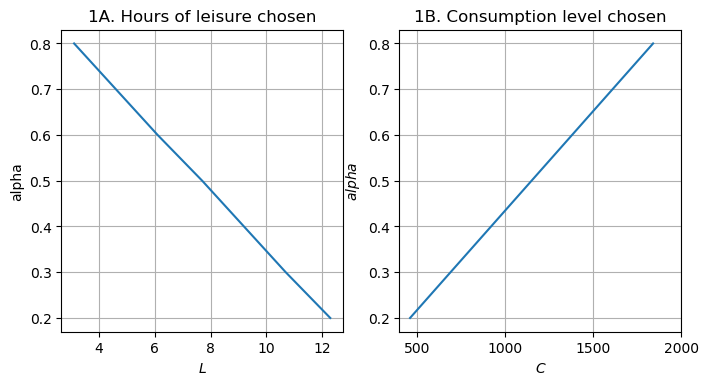

In [37]:
# a. the figure size
fig = plt.figure(figsize=(8,4),dpi=100) 

# b. left plot - choice of L given w
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(result_L,alphas)

ax_left.set_title('1A. Hours of leisure chosen')
ax_left.set_xlabel('$L$')
ax_left.set_ylabel('alpha')
ax_left.grid(True)

# c. right plot - choice of C given w
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(result_C,alphas)

ax_right.set_title('1B. Consumption level chosen')
ax_right.set_xlabel('$C$')
ax_right.set_ylabel('$alpha$')
plt.xlim(400,2000)
ax_right.grid(True)

The above results show that a smaller value of $\alpha$ leads to a larger amount of leisure at the expense of a lower consumption level. This makes intuitive sense since an individual with a low value for $\alpha$ values consumption less to leisure than an individual with a high value for $\alpha$. Hence, an individual with a low value for $\alpha$ will spent a lower share of their budget on consumption.

In what follows we will set $\alpha = 0.5$.

**The effect of w on consumption and leisure**

In the following we show how the results for $C^*$ and $L^*$ changes when the wage rate changes ($\alpha$ and non-labour income are held constant).

In [38]:
# a. specifying different values for wages (ws)
ws = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]

# b. setup
eq_con = {'type': 'eq', 'fun': eq_constraint}
x0 = (5,5) # initial guess (starting point)
alpha=0.5
result_C = [] # create empty vector for result of consumption
result_L = [] # create empty vector for result of hours of leisure

# c. call optimizer
for w in ws: # for every value in 'ws' optimise
    result = optimize.minimize(CD_utility,x0,args=alpha1,
                             method='SLSQP',
                             bounds=None,
                             constraints=eq_con,
                             options={'disp':False})
    result_C.append(result.x[0]) #saving the results for consumption
    result_L.append(result.x[1]) #saving the results for leisure

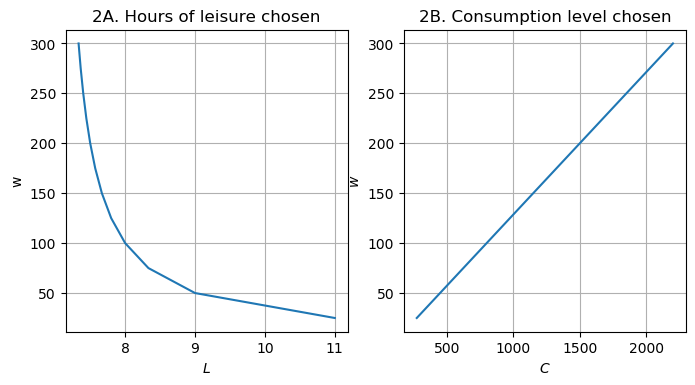

In [66]:
# plotting the results

# a. the figure size
fig = plt.figure(figsize=(8,4),dpi=100) 

# b. left plot - choice of L given w
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(result_L,ws)

ax_left.set_title('2A. Hours of leisure chosen')
ax_left.set_xlabel('$L$')
ax_left.set_ylabel('w')
ax_left.grid(True)

# c. right plot - choice of C given w
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(result_C,ws)

ax_right.set_title('2B. Consumption level chosen')
ax_right.set_xlabel('$C$')
ax_right.set_ylabel('$w$')
ax_right.grid(True)

The left figure shows that an individual will enjoy more leisure when the wage rate decreases, which makes intuitive sense since the wage rate is the opportunity cost of leisure. However, the wage rate has to decrease quite a lot (from 300 to below 100) before the agent starts to enjoy substantially more leisure. The right figure shows that consumption increases linearly with the wage rate.

# The standard model with proportional income taxation

## The model

Inserting a proportional tax in the standard model means that all workers have to pay a tax for each dollar earned. This can both affect the hours worked and the labour force participation. However, we will continue to only look at labour supply on the intensive margin. It is the same utility function as in the standard model. 

### The budget constraint

The budget constraint is now given by:
$$C=(1-\tau)w(T-L) + R,$$
where $\tau$ is the tax rate, $0< \tau \leq 1$. Since the tax is proportional to the wage you have to pay more in taxes the more you work (and hence earn).

## Solving the model numerically in Python

We use the same utility function defined in the standard model without taxation. The new budget constraint is defined below.

We set the tax rate equal to 30% ($\tau=0.30$).

In [40]:
# a. defining the new budget constraint with a proportional tax
def eq_constraint2(x):
    return (1-tau)*w*(T-x[1]) + R - x[0]

# b. setting values for T, R, w and tau
T=14 # hours available
R=200 # non-labour income
w=150 # wage rate
tau=0.3 # tax rate

In [42]:
# a. setup
eq_con2 = {'type': 'eq', 'fun': eq_constraint2} 

# b. call optimizer
x0 = (5,5) # initial guess (starting point)
alpha1 = 0.5 # as defined in the standard model
result = optimize.minimize(CD_utility,x0,args=alpha1,
                             method='SLSQP',
                             bounds=None,
                             constraints=eq_con2,
                             options={'disp':True})

# c. storing the results
result_C2 = result.x[0]
result_L2 = result.x[1]

# d. printing the results
print('\n(C,L) = ',result.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -81.48765608386502
            Iterations: 13
            Function evaluations: 52
            Gradient evaluations: 13

(C,L) =  [834.98879454   7.95248767]


The results are that the agent consumes 835 and has 7.95 hours of leisure (and work 14 - 7.95 = 6.05 hours).

The model with proportional tax results in a lower level of consumption and a higher level of leisure compared to the model without tax. The proportional tax decreases the effective wage rate, which means that the effective opportunity cost of leisure decreases. This will increase the level of leisure when leisure is a normal good. Consumption decreases because total income falls when the effective wage rate decreases.

# The standard model with progressive income taxation

## The model

Inserting a progressive tax in the standard model gives us a non-linear budget constraint with varying tax rates depending on how much you work. In this case, you pay a tax rate of zero up to a threshold of certain hours worked and thereafter you pay a positive tax rate on hours worked above that threshold. It is the same utility function as in the standard model. 

### The budget constraint

The budget constraint is now given by:
\\[
\begin{eqnarray*}
C&=&\begin{cases}
(1-\tau) w (T-L) + R + w \tau (T - L_{min}) & \text{for }L \leq L_{min}\\
w (T - L) +R & \text{for }L \geq L_{min} 
\end{cases}\\
\end{eqnarray*}
\\]

This budget constraint states that if you work more hours (and spent fewer hours on leisure) than a certain minimum (maximum) the wage earned in those hours of work is taxed. If you work below the certain minimum your budget constraint is as in the standard model.

## Solving the model numerically using Python

We use the same utility function defined in the standard model without taxation. The new budget constraint is defined below.

We set the tax rate equal to 70% ($\tau_{top}=0.70$) and the threshold equal to 8 hours ($L_{min}=8$).

In [43]:
# a. define the new budget constraint with a progressive tax
def eq_constraint3(x):
    if x[1] <= Lmin:
        eq_constraint3 = (1-tau)*w*(T-x[1]) + R + w*tau*(T-Lmin) - x[0]
    else:
        eq_constraint3 = w*(T-x[1]) + R - x[0]
    return eq_constraint3

# b. setting values for T, R, w, tau_top and Lmin
T=14 # hours available
R=200 # non-labour income
w=150 # wage rate
tau_top=0.7 # tax rate
Lmin=8 # after 8 hours of work, you will be taxed

In [44]:
# a. setup
eq_con3 = {'type': 'eq', 'fun': eq_constraint3} 

# b. call optimizer
x0 = (5,5) # initial guess (starting point)
alpha1 = 0.5 # as defined in the standard model
result = optimize.minimize(CD_utility,x0,args=alpha1,
                             method='SLSQP',
                             bounds=None,
                             constraints=eq_con3,
                             options={'disp':True})

# c. storing the results
result_C3 = result.x[0]
result_L3 = result.x[1]

# d. print the results
print('\n(C,L) = ',result.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -93.8083146672497
            Iterations: 20
            Function evaluations: 98
            Gradient evaluations: 20

(C,L) =  [1099.99985106    8.00000099]


The results are that the agent consumes 1100 and has 8 hours of leisure (and works 14 - 8 = 6 hours).

The model with progressive tax results in a lower level of consumption and about half an hour more leisure compared to the model without tax. Compared to the model with proportional tax, the agent consumes more and spent a little bit more time on leisure.

Most developed countries use a progressive tax system meaning high-income agents have a higher marginal tax rate and hence pay more in taxes. In our model, an agent gets a higher income by working more hours as the wage rate is constant. We note that the optional hours of leisure is equal to the threshold. This indicates that the agents are unwilling to work at the high marginal tax rate (even though they would have in absence of the tax). In this case, the agents bunch at the kink earning the highest possible income without having to pay the high marginal tax rate.

# Summing up

In this project we have studied the two-good standard static labour supply model without tax, with a proportional tax and with a progressive tax. In the following we sum up the results by plotting the solutions for the three versions of the model.

The exogenous variables are the same as they have been throughout the project:

In [45]:
T=14
R=200
w=150
alpha1=0.5
x0=(5,5)
tau = 0.3 #the constant tax rate in the model with proportional tax
tau_top = 0.7 #the top tax rate in the model with progressive taxation
Lmin=8

We start by defining the wage functions for the model without a tax, with a proportional income tax and a progressive income tax.

In [59]:
def wage(L):
    return w

def wage_lump(L):
    return w*(1-tau)

def wage_prog(L):
    if L <= Lmin:
        return w*(1-tau_top)
    else:
        return w

We define the leisure expenditure function for the model without a tax, with a proportional income tax and a progressive income tax. Note that the leisure expenditure function for the model without a tax and with a proportional income tax only differ because of the different effective wage rate (i.e. we can use the same leisure expenditure function and inserting the different wage rates).

In [60]:
def leisureexp(L,wage):
    return sp.integrate.quad(wage,0,L)[0]

def leisureexp_prog(L,wage): 
    if L <= Lmin:  
        return w*(1-tau_top)*L
    else:
        return w*(L-Lmin)+w*(1-tau_top)*Lmin

Taken into account the different functional forms for the wage function and leisure expenditure function the budget constraint function, utility for optimal consumption bundle and indifference curve can be defined as follows for both the model without a tax, with a proportional income tax and a progressive income tax.

In [61]:
# a. defining budget constraint
def budget(x, wage, maxlabinc, leisureexp):
    C=x[0]
    L=x[1]
    maximum = maxlabinc + R
    budget= maximum - leisureexp(L, wage) - C
    return  budget

def budget_func(wage,maxlabinc,leisureexp):
    return {'type':'eq', 'fun':budget, 'args': [wage, maxlabinc,leisureexp]}

# b. defining the utility for optimal consumption bundle
def max_u(wage, maxlabinc, leisureexp, parameters):
    temp = optimize.minimize(CD_utility, x0, args=parameters, method='SLSQP',                      
                            constraints=[budget_func(wage, maxlabinc, leisureexp)], options={'disp':False})
    return -temp.fun

# c. defining the indifference curve
def indif_opt(max_u, parameters):
    c_indif=lambda L: max_u**(1/parameters)*L**((parameters-1)/parameters)
    return [c_indif(x) for x in np.linspace(0.01,14,100)]

The following code plots the model without a tax, with a proportional income tax and a progressive income tax, plus the respective solutions.

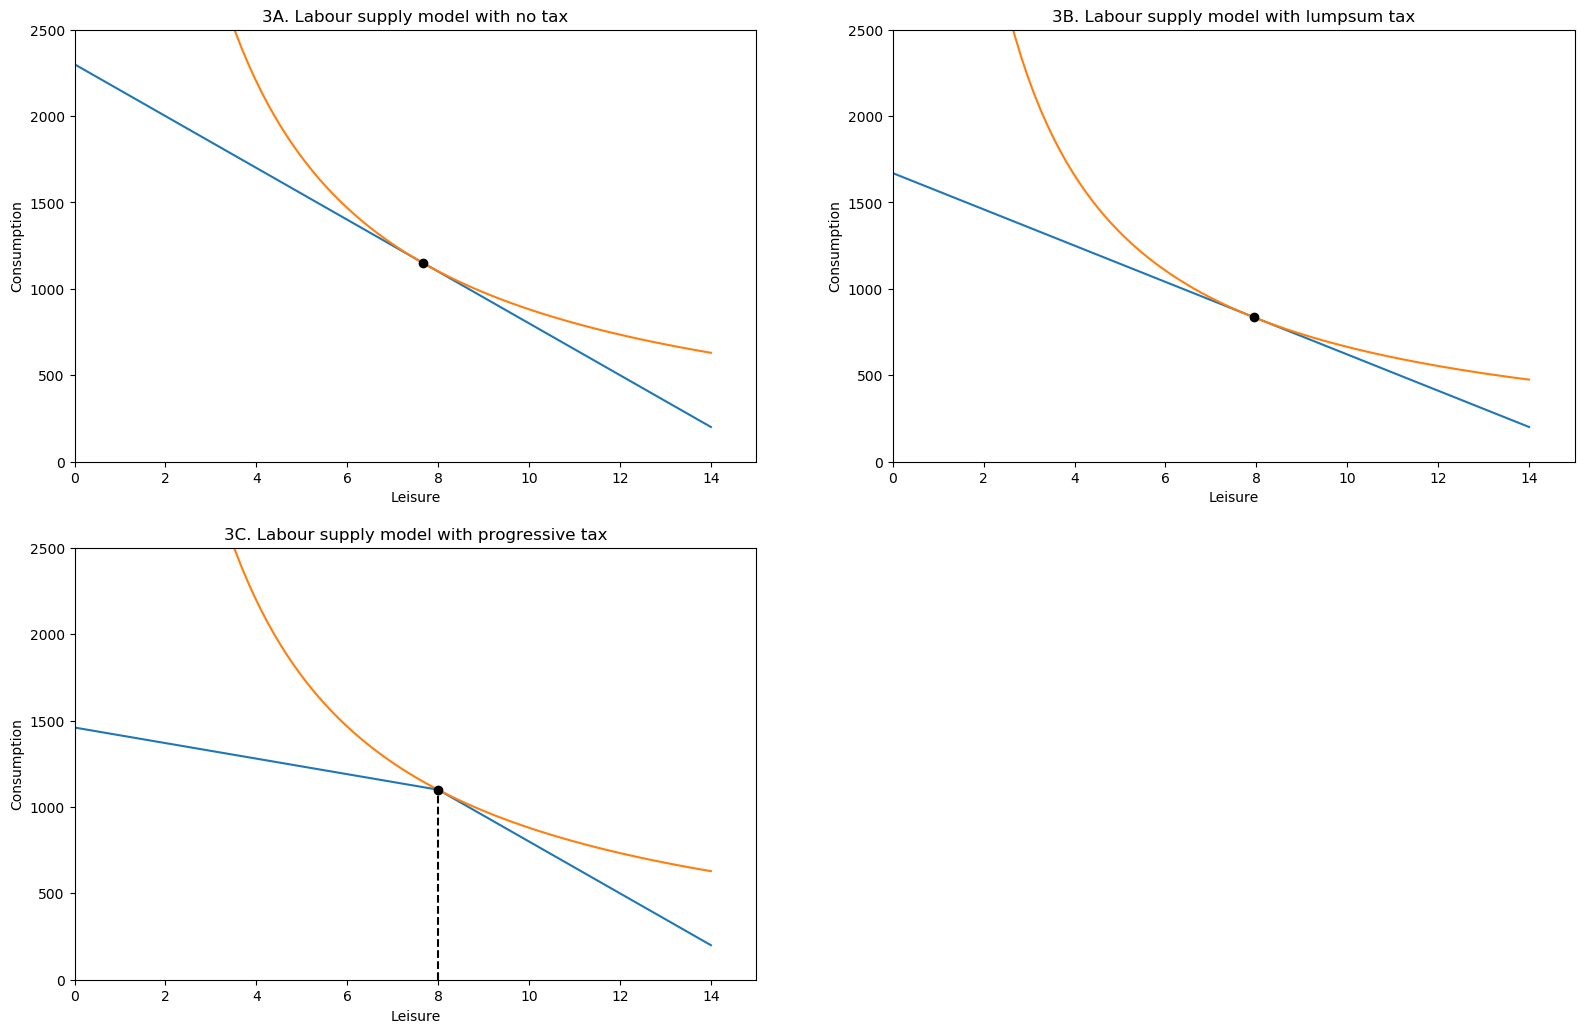

In [67]:
# Specifying the figure size 
fig = plt.figure(figsize=(8,4),dpi=100)

# A. FIGURE 1 - MODEL WITH NO TAX
# i. defining the maximum labour income with no tax
maxlabinc=leisureexp(T,wage) 

# ii. defining the income potential in the model with no tax:
maximum = maxlabinc + R

# iii. defining the function for the budget line 
goods = lambda L: maximum -leisureexp(L,wage)
cons = [goods(x) for x in np.linspace(0,14,100)]
leisure1 = np.linspace(0,14,100)

ax1 = fig.add_subplot(2,2,1)

# iv. plot the budget line with axis names
ax1.plot(leisure1,cons)

# v. plotting the indiffence curve 
ax1.plot(leisure1,indif_opt(max_u=max_u(wage=wage,maxlabinc=maxlabinc,leisureexp=leisureexp,parameters=alpha1),parameters=alpha1))
ax1.set_xlabel("Leisure")
ax1.set_ylabel("Consumption")
ax1.set_title('3A. Labour supply model with no tax')
ax1.set_ylim(0,2500)
ax1.set_xlim(0,15)
plt.plot(result_L1, result_C1, '-ok')

# B. FIGURE 2 - MODEL WITH LUMSUMP TAX
# i. defining the maximum labour income with no tax
maxlabinc_lump=leisureexp(T,wage_lump) 

# ii. defining the income potential in the model with no tax:
maximum_lump = maxlabinc_lump + R

# iii. defining the function for the budget line 
goods_lump = lambda L: maximum_lump -leisureexp(L,wage_lump)
cons_lump = [goods_lump(x) for x in np.linspace(0,14,100)]
leisure_lump = np.linspace(0,14,100)

ax2 = fig.add_subplot(2,2,2)

# iv. plot the budget line with axis names
ax2.plot(leisure_lump,cons_lump)

# v. plotting the indiffence curve 
ax2.plot(leisure_lump,indif_opt(max_u=max_u(wage=wage_lump,maxlabinc=maxlabinc_lump,leisureexp=leisureexp,parameters=alpha1),parameters=alpha1))
ax2.set_xlabel("Leisure")
ax2.set_ylabel("Consumption")
ax2.set_title('3B. Labour supply model with lumpsum tax')
ax2.set_ylim(0,2500)
ax2.set_xlim(0,15)
plt.plot(result_L2, result_C2, '-ok')

# C. FIGURE 3 - MODEL WITH PROGRESSIVE TAX

# i. defining the maximum labour income with progressive tax
maxlabinc_prog=leisureexp_prog(T,wage_prog) 

# ii. defining the income potential in the model with progressive tax
maximum_prog=maxlabinc_prog + R

# iii. define the function for the budget line 
goods_prog = lambda L: maximum_prog -leisureexp_prog(L,wage_prog)
cons_prog = [goods_prog(x) for x in np.linspace(0,14,100)]
leisure_prog = np.linspace(0,14,100)

ax3 = fig.add_subplot(2,2,3)

# iv. plot the budget line with axis names
ax3.plot(leisure_prog,cons_prog)

# v. plotting the indiffence curve 
ax3.plot(leisure_prog,indif_opt(max_u=max_u(wage=wage_prog,maxlabinc=maxlabinc_prog,leisureexp=leisureexp_prog,
                                            parameters=alpha1),parameters=alpha1))
ax3.set_xlabel("Leisure")
ax3.set_ylabel("Consumption")
ax3.set_title('3C. Labour supply model with progressive tax')
ax3.set_ylim(0,2500)
ax3.set_xlim(0,15)
plt.plot(result_L3, result_C3, '-ok')
plt.plot((Lmin,Lmin),(0,goods(Lmin)),'k--')

plt.subplots_adjust(top=2.5,right=2)

Figure 3A shows the optimal bundle of consumption and leisure in the model without tax. Figure 3B shows the optimal bundle in the model with a proportional tax rate of 30%. This changes the slope of the budget constraint and limits the possible bundles of consumption and leisure for the agent. The proportional tax also decreases the effective wage rate, which means the opportunity cost of leisure decreases. This will increase the level of leisure when leisure is a normal good. From figure 3A and 3B we see that introducing a proportional tax increases hours of leisure with 0.28 hours. Consumption decreases by 315 because total income falls when the effective wage rate decreases. 

Figure 3C shows the optimal bundle of consumption and leisure in the model with progressive taxation, where the wage for the hours of work above 6 hours (less than 8 hours of leisure) is taxed with 70%. This creates a kink in the budget line at L = 8, which is illustrated by the dashed line in the figure. The progressive tax increases hours of leisure with 0.33 hours compared to the model without tax and 0.05 hours compared to the model with proportional taxation. Consumption is increased by 265 compared to the model with proportional tax, and decrease by 50 compared to the model without taxation. This result indicates that agents are willing to give up a small amount of consumption to not work at the high marginal tax rate (i.e. they bunch at the threshold). According to the literature of taxation effects, this result is a general phenomenon. Agents with $L^*$ just above the threshold tend to bunch at the threshold. Only agents that value consumption a lot more than leisure will continue to consume leisure below the threshold even though they have to pay a higher marginal tax rate. Agents that consume more leisure than the threshold will not be affected by the introduction of a progressive tax system.